# Example of DigCNV

In [1]:
from digcnv import dataVerif, dataPreparation, digCnvModel, DigCnvPreProcessing
import pandas as pd

In [ ]:
# Path to cnvs that will be classified
cnvs = pd.read_csv('DigCNV/data/example_cnvs.tsv', sep='\t')

# List of mandatories columns to use pre the model.
model_dimensions = ['WF', 'Score_SNP', 'DENSITY', 'CallRate', 'overlapCNV_SegDup', 'TwoAlgs', 'Nb_Probe_tech']

# Column name of the true classification used for the training
true_class_name = 'SnipPeep_Ok'

In [ ]:
# cnvs = pd.read_csv('DigCNV/data/UKBB_clean_for_DigCNV.tsv', sep='\t')
# cnvs.rename(columns={'LociStart':'START',
#                     'LociStop':'STOP',
#                     'Chr':'CHR'}, inplace=True)
# print(cnvs.columns.tolist())
# cnvs["SampleID"] = ["IID_" + str(x) for x in cnvs.index.tolist()]

# cnvs_clean = cnvs[['SampleID','START', 'STOP', 'CHR', 'SCORE', 'SNP', 'TwoAlgs', 'overlapCNV_SegDup', 'overlapCNV_Centromere', 'LRR_mean', 'LRR_SD', 'BAF_mean', 'WF', 'GCWF', 'SnipPeep_Ok']]
# cnvs_clean.to_csv('./DigCNV/data/example_cnvs.tsv', sep='\t', index=False)
# callrates = cnvs[['SampleID', 'CallRate']]
# callrates.drop_duplicates(inplace=True)
# callrates.to_csv('./DigCNV/data/example_callrates.tsv', sep='\t', index=False)

## Prepare dataset for DigCNV
### Check data structure before adding other useful columns

In [ ]:
dataVerif.checkIfMandatoryColumnsExist(cnvs, post_data_preparation=False)
dataVerif.checkColumnsformats(cnvs, post_data_preparation=False)

### Adding new features comming from derived data or other datasets

In [ ]:
cnvs = dataPreparation.addDerivedFeatures(cnvs)
# cnvs = dataPreparation.addChromosomicAnnotation(cnvs)
cnvs = dataPreparation.addCallRateToDataset(cnvs, call_rate_path='./DigCNV/data/callrates.tsv', callrate_colname='CallRate', individual_colname='SampleID')
cnvs = dataPreparation.addNbProbeByTech(cnvs, pfb_file_path='./DigCNV/data/UKBB_PFB.pfb')
cnvs = dataPreparation.transformTwoAlgsFeatures(cnvs)


### Checking data before prediction

In [ ]:
dataVerif.checkIfMandatoryColumnsExist(cnvs, post_data_preparation=True)
dataVerif.checkColumnsformats(cnvs, post_data_preparation=True)
dataVerif.computeNaPercentage(cnvs, dimensions=model_dimensions)
dataVerif.plotCorrelationHeatMap(cnvs, list_dim=model_dimensions, output_path='./outputs/correlation.png')

## Run model with pretrained model

In [ ]:
model = digCnvModel.DigCnvModel()
model.openPreTrainedDigCnvModel(model_path='./digcnv/data/DigCNV_model_multiple_technos.pkl')
predicted_cnvs = model.predictCnvClasses(cnvs)
print(predicted_cnvs.shape)
print(predicted_cnvs.DigCNVpred.value_counts())

## Train model with given dataset

### Prepare datasets for training and testing

In [2]:
model = digCnvModel.DigCnvModel()
model.openPreTrainedDigCnvModel(model_path='./digcnv/data/DigCNV_model_multiple_technos.pkl')
cnvs = pd.read_csv("temp_data/UKBB_clean_for_DigCNV.tsv", sep="\t")

2022-09-12 14:26:47,975 :: __init__:	 Empty DigCNV model created
2022-09-12 14:26:48,797 :: openPreTrainedDigCnvModel:	 Pre trained model loaded from ./digcnv/data/DigCNV_model_multiple_technos.pkl
2022-09-12 14:26:48,799 :: openPreTrainedDigCnvModel:	 Version Warning: {message : UserWarning('Trying to unpickle estimator DecisionTreeClassifier from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:\nhttps://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations'), category : 'UserWarning', filename : '/home/thomas/Documents/scripts/DigCNV/DigCNVenv/lib/python3.10/site-packages/sklearn/base.py', lineno : 329, line : None}
2022-09-12 14:26:48,800 :: openPreTrainedDigCnvModel:	 Pre trained model will use ['WF', 'Score_SNP', 'DENSITY', 'CallRate', 'overlapCNV_SegDup', 'TwoAlgs', 'Nb_Probe_tech'] as predictors


2022-09-12 14:26:50,902 :: createTrainingTestingDatasets:	 Training dataset
2022-09-12 14:26:50,904 :: createTrainingTestingDatasets:	 (5167, 7)
2022-09-12 14:26:50,907 :: createTrainingTestingDatasets:	 Testing dataset
2022-09-12 14:26:50,909 :: createTrainingTestingDatasets:	 (2546, 7)
2022-09-12 14:26:50,915 :: uniformizeClassesSizes:	 
Training dataset classes
1    4863
0     304
Name: SnipPeep_Ok, dtype: int64
2022-09-12 14:26:50,960 :: uniformizeClassesSizes:	 
Training dataset after uniformizing classes
1    3890
0    1945
Name: SnipPeep_Ok, dtype: int64


1    2381
0     165
Name: SnipPeep_Ok, dtype: int64


2022-09-12 14:26:51,725 :: evaluateCnvClassification:	 Sensibility : 0.999
2022-09-12 14:26:51,729 :: evaluateCnvClassification:	 Specificity : 0.948
2022-09-12 14:26:51,737 :: evaluateCnvClassification:	 AUC : 0.99%
2022-09-12 14:26:51,743 :: evaluateCnvClassification:	 Accuracy : 0.996
2022-09-12 14:26:51,751 :: evaluateCnvClassification:	 F1 Score : 0.998


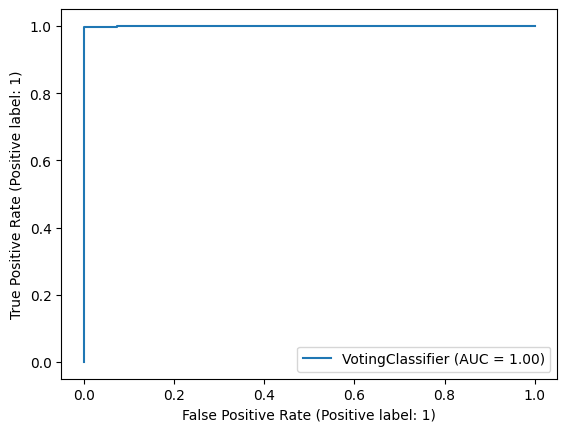

1    2381
0     165
Name: true_class, dtype: int64
(2546, 7)
(2546, 4)
(2546, 12)
1    2381
0     165
Name: true_class, dtype: int64


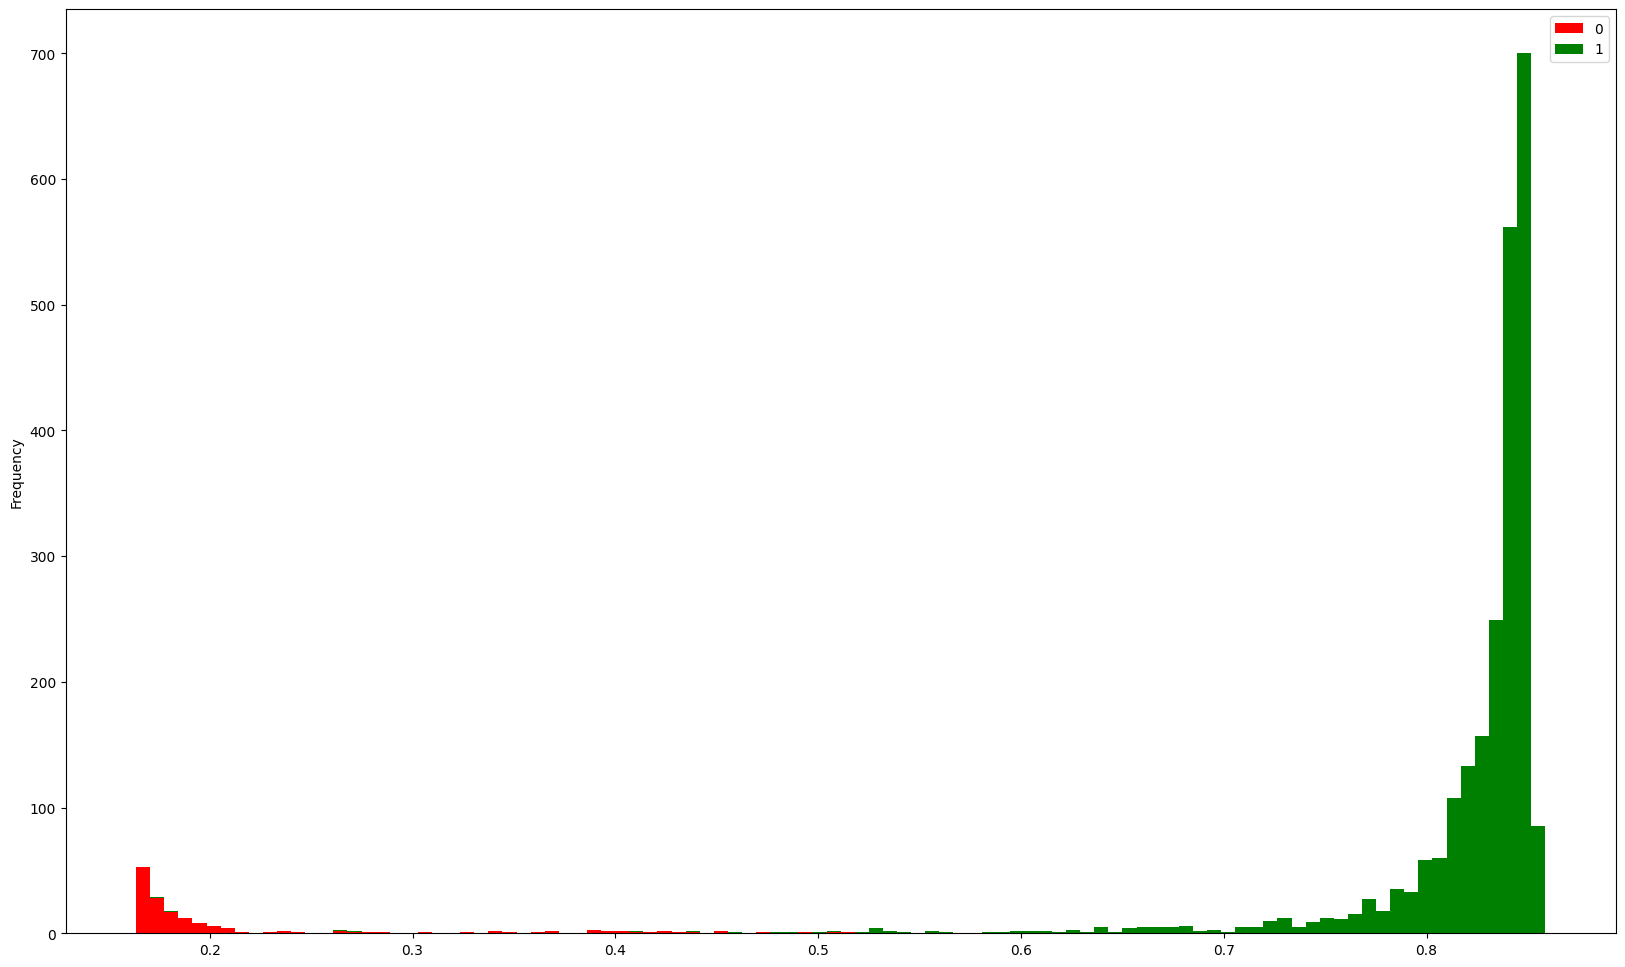

In [3]:
cnvs, removed = DigCnvPreProcessing.removeLinesWithNA(cnvs, dimensions=model._dimensions + ["SnipPeep_Ok"])

X_train, y_train, X_test, y_test = DigCnvPreProcessing.createTrainingTestingDatasets(cnvs, dimensions=model._dimensions, X_dimension="SnipPeep_Ok")
X_train, y_train = DigCnvPreProcessing.uniformizeClassesSizes(X_train, y_train, 17, 0.4, 0.5)
print(y_test.value_counts())
model.evaluateCnvClassification(testing_df=X_test, expected_values=y_test)


### Tunning hyperparameters used in the model (Optional, takes a lot of time)

### Training DigCNV model with given CNVs

In [ ]:
dig_cnv = digCnvModel.DigCnvModel()
dig_cnv.createDigCnvClassifier()
dig_cnv.trainDigCnvModel(training_data=X_train, training_cat=y_train)

### Evaluate model power + save model

In [ ]:
dig_cnv.evaluateCnvClassification(testing_df=X_test, expected_valeues=y_test)
dig_cnv.saveDigCnvModelToPkl(output_path="./outputs/trained_model.pkl")